# Feature Engineering 

The dataset contains 30 second clips of 1000 songs, 100 each for 10 genres.   
To increase the amount of training data, I have splitted each song into 10 parts of 3 seconds each.   
This gives us a total of 10000 clips of 3 seconds, 1000 for each genre.

The Audio files were splitted using the python script Audio_Splitter.py provided here.

## Feature Exploration

I will define and showcase each feature using a sample audio file from the original dataset(30 second clip)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
#Sample Audio Path
audio_path = os.path.join('Training_Audio_Data','GTZAN_Dataset','reggae','reggae.00048.wav')

#Loading Sample Audio
import librosa
audio_lb, sr = librosa.load(audio_path)

#Play the Audio
import IPython.display as ipd
ipd.Audio(audio_path)

### 1. Zero Crossing Rate

- The rate at which the signal changes from positive to negative or back.

In [2]:
zero_crossings = librosa.feature.zero_crossing_rate(audio_lb, pad=False)
zero_crossings

array([[0.02490234, 0.03466797, 0.05761719, ..., 0.14404297, 0.1015625 ,
        0.05615234]])

It returns the fraction of zero crossing in each frame of the audio file. We will calculate the mean and standard deviation of ZCR(Zero Crossing Rate for each audio file)

In [3]:
import numpy as np
np.mean(zero_crossings), np.var(zero_crossings)

(0.11116763038959783, 0.005031957667921481)

### 2. Harmonics and Perceptrual

- Harmonics are characteristichs that human ears can't distinguish (represents the sound color)
- Perceptrual understanding shock wave represents the rhythm of the music or commonly stated as the emotion of the sound

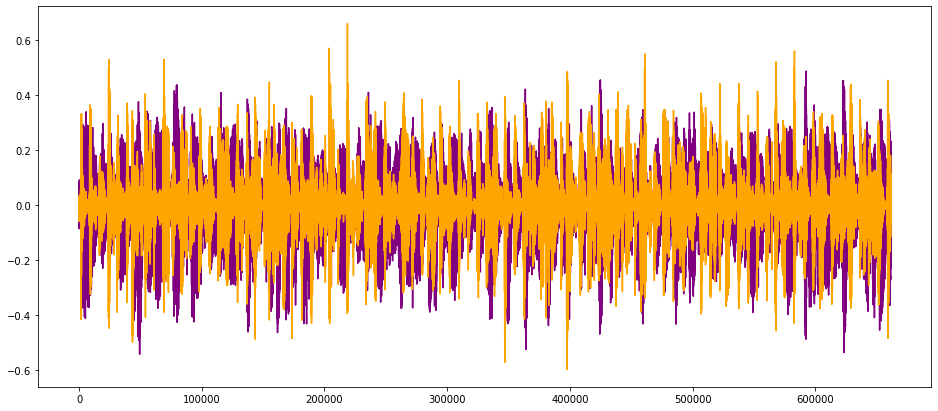

In [4]:
#Extract Harmonics and Perceptruals
y_harm, y_perc = librosa.effects.hpss(audio_lb)

#Plotting
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 7))
plt.plot(y_harm, color = 'purple')
plt.plot(y_perc, color = 'orange')

#saving
import  os
path = os.path.join('Visualization', 'Harmonics_Perceptrual.png')
plt.savefig(path, bbox_inches='tight', dpi=200);

We can again use the mean and variance of both perceptrual wave and harmonic wave to characterize the sound

In [5]:
print('Mean and Variance of Harmonics')
ipd.display((np.mean(y_harm), np.var(y_harm)))
print('\n Mean and Variance of Perceptrual')
ipd.display((np.mean(y_perc), np.var(y_perc)))

Mean and Variance of Harmonics


(2.8151135e-07, 0.008962102)


 Mean and Variance of Perceptrual


(-2.0786574e-05, 0.0030990632)

### 3. Tempo / BMP (Beats Per Minute)

In [6]:
tempo, _ = librosa.beat.beat_track(audio_lb, sr = sr)
tempo

89.10290948275862

### 4. Spectral Centroid
- Indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.

In [7]:
#Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(audio_lb, sr=sr)[0]

#Shape
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

Centroids: [1156.11258589 1212.56629741 2325.23956211 ... 3147.39378306 2817.240076
 2567.71812807] 

Shape of Spectral Centroids: (1293,) 



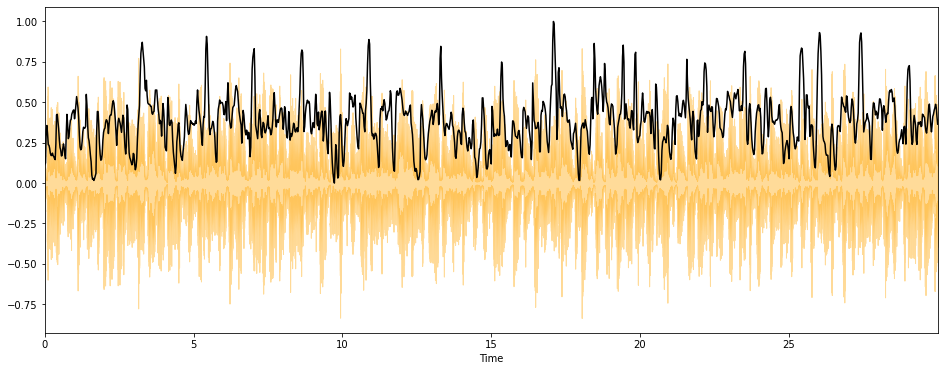

In [8]:
#Computing the time variable for visualization
frames = range(len(spectral_centroids))

#Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

#importing normalizer
from sklearn.preprocessing import minmax_scale
normalize = lambda x : minmax_scale(x, axis=0)

#Plotting the Spectral Centroid along the waveform
import librosa.display

plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_lb, sr=sr, alpha=0.4, color = 'orange');
plt.plot(t, normalize(spectral_centroids) , color = 'black');

#saving
path = os.path.join('Visualization', 'Spectral_Centroids.png')
plt.savefig(path, bbox_inches='tight', dpi=200);

### 5. Spectral Rolloff
- This is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, generally 85%, lies

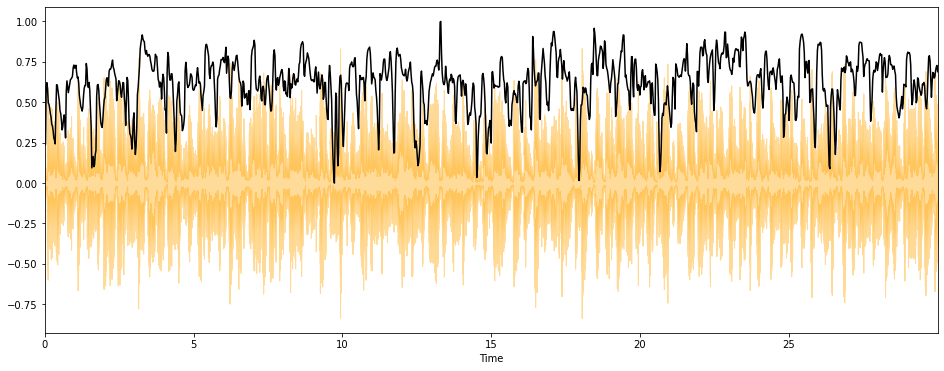

In [9]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(audio_lb, sr=sr)[0]

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_lb, sr=sr, alpha=0.4, color = 'orange');
plt.plot(t, normalize(spectral_rolloff), color = 'black');

#saving
path = os.path.join('Visualization', 'Spectral_Rolloff.png')
plt.savefig(path, bbox_inches='tight', dpi=200);

### 6. Mel-Frequency Cepstral Coefficients (MFCCs):
- The MFCCs of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.

mfccs shape: (20, 1293)

Mean: -8.8508056e-10
Var: 1.0 



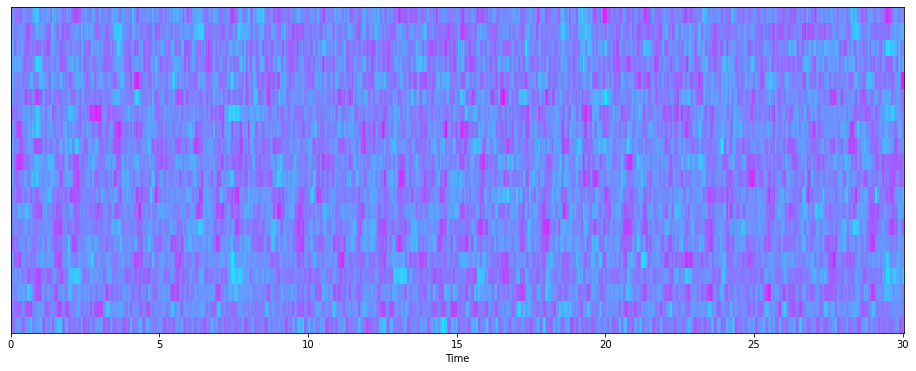

In [10]:
#Calculating MFCCs
mfccs = librosa.feature.mfcc(audio_lb, sr=sr)
print('mfccs shape:', mfccs.shape)

#Perform Feature Scaling
from sklearn.preprocessing import scale
mfccs = scale(mfccs, axis=1)
print('\nMean:', mfccs.mean())
print('Var:', mfccs.var(),'\n')

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

#saving
path = os.path.join('Visualization', 'MFCC.png')
plt.savefig(path, bbox_inches='tight', dpi=200);

We can take the mean and variance of all the 20 MFCCs giving us 20 features that will fully define the shape of envelope of the sound wave in temporal region

###  7. Chroma Frequencies
- Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave (A, A#, B, C, C#, D, D#, E, F, F#, G, G#).

Chromogram shape: (12, 1293) 



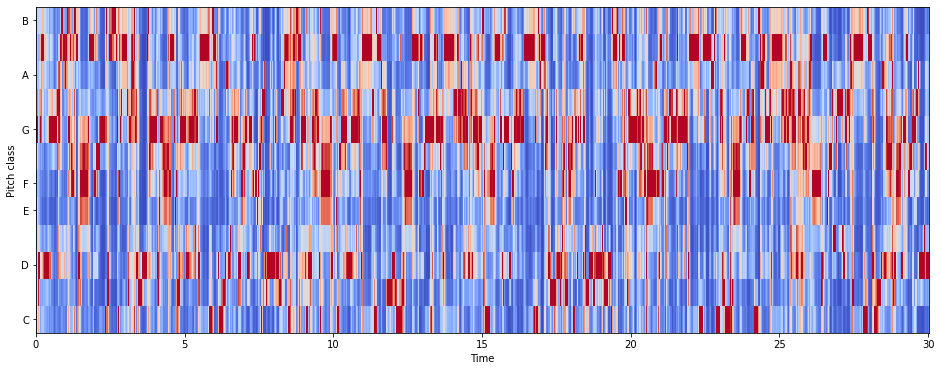

In [11]:
# Chromogram
chromagram = librosa.feature.chroma_stft(audio_lb, sr=sr)
print('Chromogram shape:', chromagram.shape, '\n')

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm');

#saving
path = os.path.join('Visualization', 'Chroma_Frequencies.png')
plt.savefig(path, bbox_inches='tight', dpi=200);

### 8. Root Mean Square

- RMS is a way of calculating the average of values over a period of time. With audio, the signal value (amplitude) is squared, averaged over a period of time, then the square root of the result is calculated.

In [12]:
#Calculating RMS for every fram
rms = librosa.feature.rms(audio_lb)
rms

array([[0.03948556, 0.05464117, 0.10635867, ..., 0.16419078, 0.15605642,
        0.1590542 ]], dtype=float32)

In [13]:
#We will use the mean and variance of the RMS series
np.mean(rms), np.var(rms)

(0.120221734, 0.0015472239)

# List of Features:

1. Chroma Frequencies
2. Root Mean Square
3. Spectral_Centroid
4. Spectral_Bandwidth
5. Spectral_Rolloff
6. Zero_Crossing_Rate
7. Harmony
8. Perceptr
9. MFCCs

# Extracting features

Features will be extracted from the splitted dataset

In [ ]:
import re

#Loop over data
data_path = os.path.join('Training_Audio_Data','Dataset_Splitted')

#Dictionary for features
feature_dic = {'File_Name' : [], 'Tempo' : [], 'Label' : []}

#Feature Names
features = ['Chroma_STFT', 'RMS', 'Spectral_Centroid', 'Spectral_Bandwidth', 'Spectral_Rolloff',
            'Zero_Crossing_Rate', 'Harmony', 'Perceptr'] + ['MFCC' + str(i) for i in range(1,21)]

#Creating an empty structure inside dictionary
for feature in features:
  feature_dic[feature + '_Mean'] = []
  feature_dic[feature + '_Var'] = []

for dirname, dirs, files in os.walk(data_path):
  for audio_fn in files:
    audio_path = os.path.join(dirname, audio_fn)
    audio_lb, sr = librosa.load(audio_path)

    #File_Name
    feature_dic['File_Name'].append(audio_fn[0:-4])

    #Label
    feature_dic['Label'].append(re.search(r'([a-z]*)\.', audio_fn).group(1))

    #Chorma_STFT
    chroma_stft = librosa.feature.chroma_stft(audio_lb, sr=sr)
    feature_dic['Chroma_STFT_Mean'].append(np.mean(chroma_stft))
    feature_dic['Chroma_STFT_Var'].append(np.var(chroma_stft))

    #Root Mean Square
    rms = librosa.feature.rms(audio_lb)
    feature_dic['RMS_Mean'].append(np.mean(rms))
    feature_dic['RMS_Var'].append(np.var(rms))

    #Spectral Centroid
    spec_cent = librosa.feature.spectral_centroid(audio_lb, sr=sr)[0]
    feature_dic['Spectral_Centroid_Mean'].append(np.mean(spec_cent))
    feature_dic['Spectral_Centroid_Var'].append(np.var(spec_cent))

    #Spectral Bandwidth
    spec_band = librosa.feature.spectral_bandwidth(audio_lb, sr=sr)[0]
    feature_dic['Spectral_Bandwidth_Mean'].append(np.mean(spec_band))
    feature_dic['Spectral_Bandwidth_Var'].append(np.var(spec_band))

    #Spectral RollOff 
    spec_roll = librosa.feature.spectral_rolloff(audio_lb, sr=sr)[0]
    feature_dic['Spectral_Rolloff_Mean'].append(np.mean(spec_roll))
    feature_dic['Spectral_Rolloff_Var'].append(np.var(spec_roll))

    #Zero Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(audio_lb)
    feature_dic['Zero_Crossing_Rate_Mean'].append(np.mean(zcr))
    feature_dic['Zero_Crossing_Rate_Var'].append(np.var(zcr))

    #Harmony and Perceptr
    harmony, perceptr = librosa.effects.hpss(audio_lb)
    feature_dic['Harmony_Mean'].append(np.mean(harmony))
    feature_dic['Harmony_Var'].append(np.var(harmony))
    feature_dic['Perceptr_Mean'].append(np.mean(perceptr))
    feature_dic['Perceptr_Var'].append(np.var(perceptr))

    #Tempo
    tempo, _ = librosa.beat.beat_track(audio_lb, sr=sr)
    feature_dic['Tempo'].append(tempo)

    #Mel-Frequency Cepstrum Coefficients(20)
    mfccs = librosa.feature.mfcc(audio_lb, sr=sr)
    for k, mfcc in enumerate(mfccs):
      feature_name = 'MFCC' + str(k+1)
      feature_dic[feature_name + '_Mean'].append(np.mean(mfcc))
      feature_dic[feature_name + '_Var'].append(np.var(mfcc))

In [15]:
#Loading the extracted features as a Dataframe
import pandas as pd
df = pd.DataFrame(feature_dic).sort_values(by='File_Name').reset_index(drop=True)
print(f'The Shape of the extracted data : {df.shape}')
df.head(10)

The Shape of the extracted data : (9981, 59)


,File_Name,Tempo,Label,Chroma_STFT_Mean,Chroma_STFT_Var,RMS_Mean,RMS_Var,Spectral_Centroid_Mean,Spectral_Centroid_Var,Spectral_Bandwidth_Mean,...,MFCC16_Mean,MFCC16_Var,MFCC17_Mean,MFCC17_Var,MFCC18_Mean,MFCC18_Var,MFCC19_Mean,MFCC19_Var,MFCC20_Mean,MFCC20_Var
0,blues.00000.0,129.199219,blues,0.335434,0.091088,0.130405,0.003521,1773.285877,168244.72840,1972.723622,...,-2.849641,39.725563,-3.241225,36.486427,0.721986,38.096760,-5.043307,33.608330,-0.237658,43.827770
1,blues.00000.1,123.046875,blues,0.343020,0.086142,0.112699,0.001450,1816.195860,90703.32519,2009.201575,...,4.123801,65.312965,-6.100084,40.738820,0.219240,50.587795,-2.875456,96.975440,5.800726,60.006115
2,blues.00000.2,123.046875,blues,0.346838,0.092210,0.132002,0.004620,1788.642783,111322.53710,2085.045996,...,4.789981,67.582200,-1.801321,28.132212,2.308315,48.102486,-1.931482,53.116814,2.522431,33.136240
3,blues.00000.3,123.046875,blues,0.363671,0.086856,0.132562,0.002447,1654.902168,112316.26440,1959.202709,...,-1.322859,47.059677,-3.859235,27.984930,1.255384,35.093280,-3.619866,51.420635,3.639336,31.930040
4,blues.00000.4,123.046875,blues,0.335927,0.088291,0.143289,0.001701,1630.737017,79648.22830,1948.459295,...,2.090514,30.307617,0.629567,44.883636,1.709781,51.706690,-3.402106,26.686306,0.546950,29.212286
5,blues.00000.5,129.199219,blues,0.376708,0.089697,0.132616,0.003582,1994.819317,211680.60150,2152.731465,...,2.127415,31.448997,-3.451859,34.249730,-0.423986,40.651905,-3.648145,32.434204,3.032700,28.947874
6,blues.00000.6,123.046875,blues,0.379726,0.088830,0.130335,0.003166,1961.874832,177560.73710,2146.085036,...,4.923849,34.005200,-2.062544,25.582666,1.424155,48.113520,-3.294250,39.954163,3.264090,26.405811
7,blues.00000.7,123.046875,blues,0.331950,0.092119,0.140600,0.002546,1701.061976,36059.20737,1978.385931,...,3.165413,38.102030,-3.621734,24.292175,-0.134446,27.063774,-2.018185,23.135494,0.245327,41.895775
8,blues.00000.8,123.046875,blues,0.347888,0.094213,0.133130,0.002538,1746.554910,138080.63260,1887.905052,...,-0.281388,44.361240,-4.389765,29.967940,2.103550,33.893616,-2.253540,80.820076,3.742997,97.602910
9,blues.00000.9,123.046875,blues,0.358129,0.082959,0.115312,0.001846,1763.901092,61526.09215,1874.074458,...,6.698558,43.888290,-3.460883,48.740390,0.099310,41.846916,-7.689276,96.331280,0.803042,40.510178


In [ ]:
#Saving the extracted features in a csv
path = os.path.join('Training_Features', 'Splitted_Dataset_Features_3sec.csv')
df.to_csv(path, index=False)

#Exploratory Data Analysis

## Correlation Heatmap for extracted Features Means

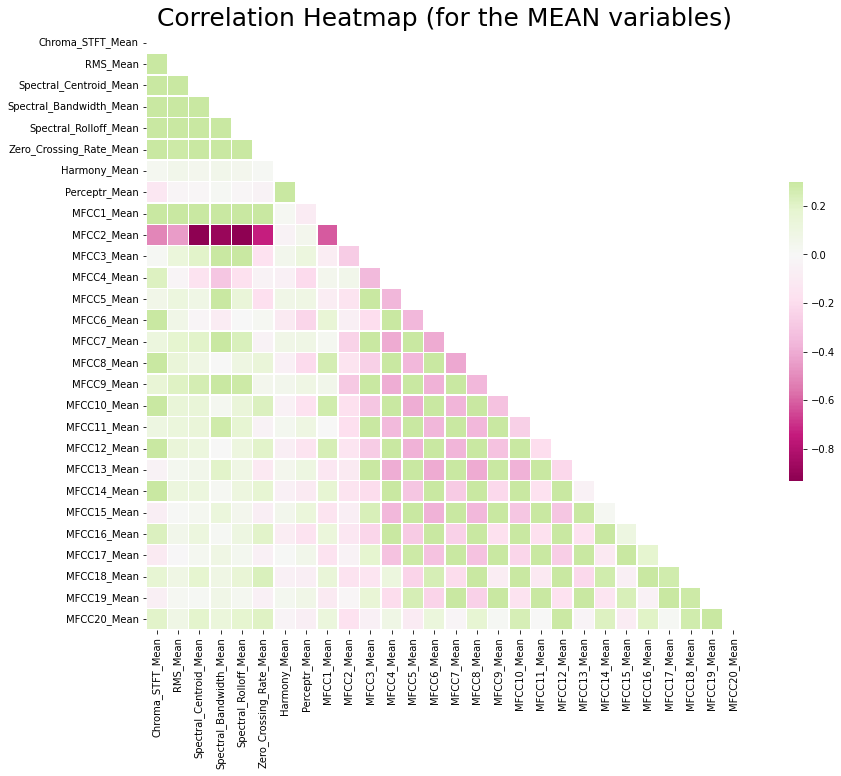

In [17]:
# Computing the Correlation Matrix
mean_cols = [col for col in df.columns if 'Mean' in col]
corr = df[mean_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Draw the heatmap with the mask
import seaborn as sns
sns.heatmap(corr, mask=mask, cmap='PiYG', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

#Saving
path = os.path.join('Visualization','Correlation_Heatmap.png')
plt.savefig(path,bbox_inches='tight', pad_inches=0.2, dpi=300)

## Feature Importance Using Gradient Boosting(XGB) Classifier



In [18]:
#Label Encoding
label_enc = {}
for i, label in enumerate(df.Label.unique()):
  label_enc[label] = i

label_enc

{'blues': 0,
 'classical': 1,
 'country': 2,
 'disco': 3,
 'hiphop': 4,
 'jazz': 5,
 'metal': 6,
 'pop': 7,
 'reggae': 8,
 'rock': 9}

In [19]:
#Seperating features and labels
X = df.drop(columns=['File_Name', 'Label'])
y = df['Label'].apply(lambda x : label_enc[x])

#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X))

#Initiating xgb classifier
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=200, random_state=42,max_depth=4,colsample_bytree=0.7,gamma=0.3,subsample=0.7)

#training
xgb_model.fit(X_train,y);

#Showing raw importance scores
feature_imp = {'features' : X.columns, 'importance' : xgb_model.feature_importances_}
pd.DataFrame(feature_imp).sort_values(by='importance', ascending=False).reset_index(drop=True).head(10)

,features,importance
0,Spectral_Centroid_Var,0.049553
1,Perceptr_Var,0.048786
2,Spectral_Bandwidth_Mean,0.044924
3,Chroma_STFT_Mean,0.038520
4,MFCC4_Mean,0.037558
5,RMS_Var,0.033322
6,Chroma_STFT_Var,0.030126
7,Harmony_Var,0.028906
8,Spectral_Rolloff_Mean,0.028572
9,MFCC7_Var,0.025839


#### **Remarks**
These are the raw importances scores. But since we know that MFCC_Mean and MFCC_Var came from the same feature of MFCC, we can club these importances together to see which audio feature type was the most influential for the model

In [20]:
#Clubbing together same features
feature_scores = {}

for ft, imp in zip(feature_imp['features'], feature_imp['importance']):

  #Extracting root feature
  ls = ft.split('_')
  if len(ls) > 2: 
    root_ft = '_'.join(ls[0:2])
  else:
    root_ft = ls[0]

  #updateing importance
  if 'MFCC' in root_ft: #Combining all MFCCs
    feature_scores['20_MFCC'] = feature_scores.get('20_MFCC', 0) + imp
  else:
    feature_scores[root_ft] = feature_scores.get(root_ft, 0) + imp

df_importance = pd.DataFrame(data={'features' : feature_scores.keys(), 'importance' : feature_scores.values()})
df_importance = df_importance.sort_values(by='importance',ascending=False).reset_index(drop=True)

#Showing updated importances
df_importance

,features,importance
0,20_MFCC,0.537822
1,Perceptr,0.069571
2,Chroma_STFT,0.068645
3,Spectral_Centroid,0.067150
4,Spectral_Bandwidth,0.057241
5,RMS,0.053089
6,Harmony,0.046560
7,Spectral_Rolloff,0.045769
8,Zero_Crossing,0.032471
9,Tempo,0.021680


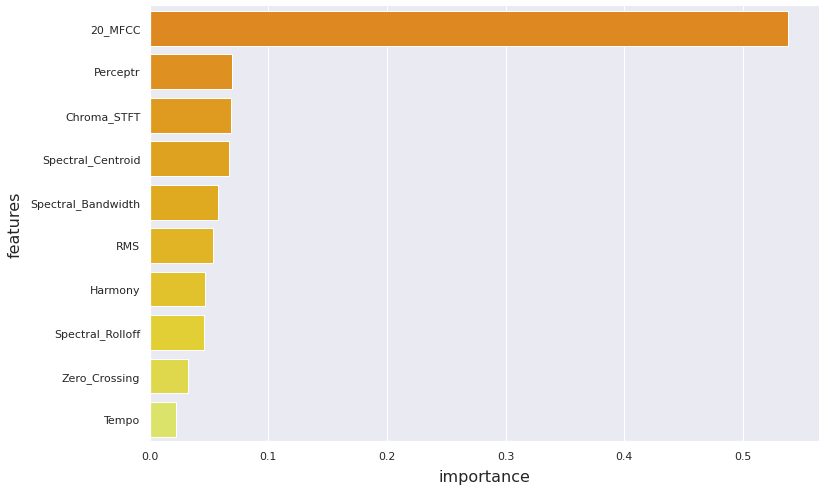

In [21]:
#Visualizing feature importances
plt.figure(figsize=(12,8))
sns.set(rc={'axes.spines.right' : False,'axes.spines.top' : False, 'axes.labelsize': 16,  'axes.labelpad': 8,
            'axes.grid': True, 'axes.edgecolor': 'white','grid.color': (1,1,1,0)})
sns.barplot(data=df_importance, x='importance',y='features',ax=plt.gca(), palette='Wistia_r');

#saving
path = os.path.join('Visualization', 'Feature_Importances.png')
plt.savefig(path,bbox_inches='tight', pad_inches=0.2, dpi=300)

### **Remarks**

We can see that MFCC(s) together hold more than 50% of the predictive power of the model, while tempo is the least important.